In [3]:
import pandas as pd
import numpy as np


In [4]:
# Importing source data from device_demographics

device_demographics = pd.read_csv("Dataset/device_demographics.csv")
device_demographics.head()

,device_id,gender_id
0,B-52-23845,2.0
1,B-52-16587,1.0
2,B-52-36461,2.0
3,B-52-29089,2.0
4,B-52-14212,2.0


In [5]:
# Checking duplicates if any based on device_id

device_demographics[device_demographics.duplicated('device_id')]


,device_id,gender_id


In [6]:
#Importing second source data frpm publishers.csv

publishers = pd.read_csv("Dataset/publishers.csv")
publishers.head()

,app_name,Publisher
0,Walmart (Mobile App),Wal-Mart
1,Microsoft Word (Mobile App),Microsoft Sites
2,Sam's Club Scan & Go (Mobile App),Wal-Mart
3,Pinterest (Mobile App),Pinterest
4,YouTube (Mobile App),Google Sites


In [7]:
# Checking the duplicates if any

publishers[publishers.duplicated()]


,app_name,Publisher
21,Walmart (Mobile App),Wal-Mart
22,Microsoft Word (Mobile App),Microsoft Sites


In [8]:
len(publishers)

23

In [9]:
#Rmoving the duplicates

publishers.drop_duplicates(inplace=True)

In [10]:
len(publishers)

21

In [11]:
#Importing usr activity data 

user_act = pd.read_csv("Dataset/User_activity.txt")
user_act.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,22438,22439,22440,22441,22442,22443,22444,22445,22446,22447
0,device_id,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-14212,B-52-30970,B-52-15903,B-52-12407,B-52-22743,...,B-52-16131,B-52-50027,B-52-23845,B-52-16587,B-52-36461,B-52-29089,B-52-13395,B-52-8702,B-52-50977,B-52-48431
1,app_name,Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),Instagram (Mobile App),Yahoo Newsroom (Mobile App),Google Search (Mobile App),YouTube (Mobile App),...,Google Search (Mobile App),Facebook Messenger (Mobile App),Snapchat (Mobile App),Pinterest (Mobile App),Facebook (Mobile App),Yahoo Mail (Mobile App),Netflix (Mobile App),GroupMe (Mobile App),Instagram (Mobile App),YouTube (Mobile App)
2,minutes,27.9342,14.6664,439.7652,900.6606,17.3502,16.065,42.6006,90.1152,NaN,...,1.89,464.8644,27.9342,14.6664,439.7652,900.6606,1.1340000000000001,343.5264,0.9072,994.6692


In [12]:
#Transposing user activity data for a better view

user_act = user_act.transpose()
user_act.head()

,0,1,2
Unnamed: 0,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606


In [13]:
# Removing index from column and making 1st row index

user_act=user_act.rename(columns=user_act.iloc[0]).drop(user_act.index[0])
user_act.head()


,device_id,app_name,minutes
0,B-52-23845,Snapchat (Mobile App),27.9342
1,B-52-16587,Pinterest (Mobile App),14.6664
2,B-52-36461,Facebook (Mobile App),439.7652
3,B-52-29089,Yahoo Mail (Mobile App),900.6606
4,B-52-14212,Netflix (Mobile App),17.3502


In [14]:
#Cheking any duplicated data present in user activity data

user_act.duplicated().sum()

8

In [15]:
len(user_act)

22448

In [16]:
user_act.drop_duplicates(inplace=True)

In [17]:
len(user_act)

22440

# TRANSFORMATION 1

In [18]:
# Joining the Publishrs data with user activity data based on app_name

merg1=pd.merge(publishers,user_act,on='app_name')
merg1.head()


,app_name,Publisher,device_id,minutes
0,Walmart (Mobile App),Wal-Mart,B-52-29735,0.1512
1,Walmart (Mobile App),Wal-Mart,B-52-8398,NaN
2,Walmart (Mobile App),Wal-Mart,B-52-26391,32.6592
3,Walmart (Mobile App),Wal-Mart,B-52-14592,51.7482
4,Walmart (Mobile App),Wal-Mart,B-52-4902,24.6078


In [19]:
# Joining the output recieved from previous merge with device_demographics data

trans1=pd.merge(merg1,device_demographics,on='device_id')
trans1.head()             


,app_name,Publisher,device_id,minutes,gender_id
0,Walmart (Mobile App),Wal-Mart,B-52-29735,0.1512,1.0
1,Pinterest (Mobile App),Pinterest,B-52-29735,0.18899999999999997,1.0
2,YouTube (Mobile App),Google Sites,B-52-29735,171.3096,1.0
3,Netflix (Mobile App),Netflix Inc.,B-52-29735,42.525,1.0
4,Tumblr (Mobile App),Oath,B-52-29735,1611.9054,1.0


In [20]:
# Checking the duplicates row if any

trans1.duplicated().sum()

0

In [21]:
# Sorting the Data by app_name and minutes 

trans1.sort_values(by=['app_name','minutes'],inplace=True)
trans1.head()

,app_name,Publisher,device_id,minutes,gender_id
1935,Amazon Mobile (Mobile App),Amazon Sites,B-52-52155,0.0378,2.0
2597,Amazon Mobile (Mobile App),Amazon Sites,B-52-9082,0.0756,2.0
15341,Amazon Mobile (Mobile App),Amazon Sites,B-52-20729,0.0756,1.0
21651,Amazon Mobile (Mobile App),Amazon Sites,B-52-38817,0.0756,2.0
10488,Amazon Mobile (Mobile App),Amazon Sites,B-52-41002,0.1134,1.0


In [22]:
# Resetting the index of transformed data1

trans1.reset_index(drop=True,inplace=True)
trans1.head()

,app_name,Publisher,device_id,minutes,gender_id
0,Amazon Mobile (Mobile App),Amazon Sites,B-52-52155,0.0378,2.0
1,Amazon Mobile (Mobile App),Amazon Sites,B-52-9082,0.0756,2.0
2,Amazon Mobile (Mobile App),Amazon Sites,B-52-20729,0.0756,1.0
3,Amazon Mobile (Mobile App),Amazon Sites,B-52-38817,0.0756,2.0
4,Amazon Mobile (Mobile App),Amazon Sites,B-52-41002,0.1134,1.0


In [23]:
# Rearranging the final dataframe as suggested in problem statement

trans1 =trans1[['device_id','gender_id','app_name','minutes','Publisher']]
trans1.head()

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites


# Tranformation 2

In [24]:
# Created the lookup file using group by on column app_name and publisher and taken the mode across the gender_id

lookup_file1 = trans1.groupby(['app_name', 'Publisher'])['gender_id'].agg(pd.Series.mode) 
lookup_file1
                 

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites       2.0
Amazon Music with Prime Music (Mobile App)  Amazon Sites       2.0
Facebook (Mobile App)                       Facebook           2.0
Facebook Messenger (Mobile App)             Facebook           2.0
Google Play (Mobile App)                    Google Sites       2.0
Google Search (Mobile App)                  Google Sites       2.0
GroupMe (Mobile App)                        Microsoft Sites    2.0
Instagram (Mobile App)                      Facebook           2.0
Kindle (Mobile App)                         Amazon Sites       2.0
Microsoft Word (Mobile App)                 Microsoft Sites    2.0
Netflix (Mobile App)                        Netflix Inc.       2.0
Outlook (Mobile App)                        Microsoft Sites    2.0
Pinterest (Mobile App)                      Pinterest          2.0
Sam's Club (Mobile App)                     Wal-Mart           2.0
Sa

In [25]:
# stored the previous grouped data into pandas dataframe

lookup_file1=pd.DataFrame(lookup_file1)
lookup_file1

,,gender_id
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,2.0
Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
Facebook (Mobile App),Facebook,2.0
Facebook Messenger (Mobile App),Facebook,2.0
Google Play (Mobile App),Google Sites,2.0
Google Search (Mobile App),Google Sites,2.0
GroupMe (Mobile App),Microsoft Sites,2.0
Instagram (Mobile App),Facebook,2.0
Kindle (Mobile App),Amazon Sites,2.0


In [26]:
# resetting the index for lookup_file

lookup_file1.reset_index(inplace=True)
lookup_file1


,app_name,Publisher,gender_id
0,Amazon Mobile (Mobile App),Amazon Sites,2.0
1,Amazon Music with Prime Music (Mobile App),Amazon Sites,2.0
2,Facebook (Mobile App),Facebook,2.0
3,Facebook Messenger (Mobile App),Facebook,2.0
4,Google Play (Mobile App),Google Sites,2.0
5,Google Search (Mobile App),Google Sites,2.0
6,GroupMe (Mobile App),Microsoft Sites,2.0
7,Instagram (Mobile App),Facebook,2.0
8,Kindle (Mobile App),Amazon Sites,2.0
9,Microsoft Word (Mobile App),Microsoft Sites,2.0


In [27]:
#Checking duplicates in lookup file

lookup_file1.isnull().sum()

app_name     0
Publisher    0
gender_id    0
dtype: int64

In [28]:
# Merging the transfomed data1 with lookfile1 to replcae missing values in gender_id column


trans2 =pd.merge(trans1,lookup_file1,on=['app_name','Publisher'],how='left')
trans2

,device_id,gender_id_x,app_name,minutes,Publisher,gender_id_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,2.0
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,2.0
...,...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),NaN,Google Sites,2.0
22436,B-52-25897,1.0,YouTube (Mobile App),NaN,Google Sites,2.0
22437,B-52-42731,2.0,YouTube (Mobile App),NaN,Google Sites,2.0
22438,B-52-41344,1.0,YouTube (Mobile App),NaN,Google Sites,2.0


In [ ]:
# Checking the null values in tranformed data2

trans2.isnull().sum()

In [29]:
# Now we have two column gender_id_x & gender_id_y. we use gender_id_y values to replace 
# missing values in gender_id_x.

trans2['gender_id_x'] = trans2.apply(
    lambda row: row['gender_id_y'] if np.isnan(row['gender_id_x']) else row['gender_id_x'],
    axis=1
)

In [30]:
trans2.head()

,device_id,gender_id_x,app_name,minutes,Publisher,gender_id_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,2.0
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,2.0
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,2.0


In [31]:
# Cheking null values in previous tranformed data
trans2.isnull().sum()

device_id        0
gender_id_x      0
app_name         0
minutes        748
Publisher        0
gender_id_y      0
dtype: int64

In [32]:
#checking unique value in gender_id

trans2.gender_id_x.unique()

array([2., 1.])

In [33]:
# Deleted gender_id_y column from tranformed data2

del trans2['gender_id_y']
trans2.rename(columns={'gender_id_x': 'gender_id'},inplace=True)
trans2

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),NaN,Google Sites
22436,B-52-25897,1.0,YouTube (Mobile App),NaN,Google Sites
22437,B-52-42731,2.0,YouTube (Mobile App),NaN,Google Sites
22438,B-52-41344,1.0,YouTube (Mobile App),NaN,Google Sites


# Transformation 3

In [34]:
# Create second lookup_file using groupby column 'app_name'and 'Publisher' and taken the median across minutes column id
    
lookup_file2 = trans1.groupby(['app_name','Publisher'])['minutes'].agg(pd.Series.median)
lookup_file2

app_name                                    Publisher      
Amazon Mobile (Mobile App)                  Amazon Sites         47.1555
Amazon Music with Prime Music (Mobile App)  Amazon Sites         34.3980
Facebook (Mobile App)                       Facebook           2764.6542
Facebook Messenger (Mobile App)             Facebook           1349.6490
Google Play (Mobile App)                    Google Sites         57.6639
Google Search (Mobile App)                  Google Sites        119.8638
GroupMe (Mobile App)                        Microsoft Sites      64.6758
Instagram (Mobile App)                      Facebook            247.2498
Kindle (Mobile App)                         Amazon Sites         25.4394
Microsoft Word (Mobile App)                 Microsoft Sites      11.6046
Netflix (Mobile App)                        Netflix Inc.         79.4934
Outlook (Mobile App)                        Microsoft Sites     103.2696
Pinterest (Mobile App)                      Pinterest           

In [35]:
# storing lookup_file2 data into dataframe

lookup_file2 = pd.DataFrame(lookup_file2)
lookup_file2.head()

,,minutes
app_name,Publisher,
Amazon Mobile (Mobile App),Amazon Sites,47.1555
Amazon Music with Prime Music (Mobile App),Amazon Sites,34.3980
Facebook (Mobile App),Facebook,2764.6542
Facebook Messenger (Mobile App),Facebook,1349.6490
Google Play (Mobile App),Google Sites,57.6639


In [36]:
# Resetting index in lookup_file2

lookup_file2.reset_index(inplace=True)
lookup_file2

,app_name,Publisher,minutes
0,Amazon Mobile (Mobile App),Amazon Sites,47.1555
1,Amazon Music with Prime Music (Mobile App),Amazon Sites,34.3980
2,Facebook (Mobile App),Facebook,2764.6542
3,Facebook Messenger (Mobile App),Facebook,1349.6490
4,Google Play (Mobile App),Google Sites,57.6639
5,Google Search (Mobile App),Google Sites,119.8638
6,GroupMe (Mobile App),Microsoft Sites,64.6758
7,Instagram (Mobile App),Facebook,247.2498
8,Kindle (Mobile App),Amazon Sites,25.4394
9,Microsoft Word (Mobile App),Microsoft Sites,11.6046


In [37]:
# Merged the tranformed data2 with lookfile2 to replace the missing values in minutes column in transformed data2

trans3= pd.merge(trans2,lookup_file2, on=['app_name','Publisher'],how='left')
trans3

,device_id,gender_id,app_name,minutes_x,Publisher,minutes_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,47.1555
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,47.1555
...,...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),NaN,Google Sites,209.8656
22436,B-52-25897,1.0,YouTube (Mobile App),NaN,Google Sites,209.8656
22437,B-52-42731,2.0,YouTube (Mobile App),NaN,Google Sites,209.8656
22438,B-52-41344,1.0,YouTube (Mobile App),NaN,Google Sites,209.8656


In [38]:
trans3.isnull().sum()

device_id      0
gender_id      0
app_name       0
minutes_x    748
Publisher      0
minutes_y      0
dtype: int64

In [39]:
# Filing the missing value in minutes_x in  trans3 from corresponding minutes_y values
trans3['minutes_x']. fillna(trans3['minutes_y'], inplace=True)
trans3

,device_id,gender_id,app_name,minutes_x,Publisher,minutes_y
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites,47.1555
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites,47.1555
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites,47.1555
...,...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),209.8656,Google Sites,209.8656
22436,B-52-25897,1.0,YouTube (Mobile App),209.8656,Google Sites,209.8656
22437,B-52-42731,2.0,YouTube (Mobile App),209.8656,Google Sites,209.8656
22438,B-52-41344,1.0,YouTube (Mobile App),209.8656,Google Sites,209.8656


In [40]:
trans3.isnull().sum()


device_id    0
gender_id    0
app_name     0
minutes_x    0
Publisher    0
minutes_y    0
dtype: int64

In [41]:
trans3.minutes_x.unique()

array(['0.0378', '0.0756', '0.1134', ..., '9958.3722', '999.5454',
       209.8656], dtype=object)

In [42]:
del trans3['minutes_y']
trans3.rename(columns={'minutes_x':'minutes'},inplace=True)
trans3

,device_id,gender_id,app_name,minutes,Publisher
0,B-52-52155,2.0,Amazon Mobile (Mobile App),0.0378,Amazon Sites
1,B-52-9082,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
2,B-52-20729,1.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
3,B-52-38817,2.0,Amazon Mobile (Mobile App),0.0756,Amazon Sites
4,B-52-41002,1.0,Amazon Mobile (Mobile App),0.1134,Amazon Sites
...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),209.8656,Google Sites
22436,B-52-25897,1.0,YouTube (Mobile App),209.8656,Google Sites
22437,B-52-42731,2.0,YouTube (Mobile App),209.8656,Google Sites
22438,B-52-41344,1.0,YouTube (Mobile App),209.8656,Google Sites


In [43]:
trans3.isnull().sum()

device_id    0
gender_id    0
app_name     0
minutes      0
Publisher    0
dtype: int64

In [44]:
trans3.duplicated().sum()

0

# Transformation 4

In [47]:
res=trans3.groupby('app_name').agg(['median','std'])['minutes']
res

,median,std
app_name,,
Amazon Mobile (Mobile App),47.1555,311.223196
Amazon Music with Prime Music (Mobile App),34.3980,449.620841
Facebook (Mobile App),2764.6542,3248.020616
Facebook Messenger (Mobile App),1349.6490,3039.701650
Google Play (Mobile App),57.6639,548.827380
Google Search (Mobile App),119.8638,1910.343859
GroupMe (Mobile App),64.6758,276.153920
Instagram (Mobile App),247.2498,1480.795910
Kindle (Mobile App),25.4394,1623.650743


In [48]:
res=pd.DataFrame(res)
res

,median,std
app_name,,
Amazon Mobile (Mobile App),47.1555,311.223196
Amazon Music with Prime Music (Mobile App),34.3980,449.620841
Facebook (Mobile App),2764.6542,3248.020616
Facebook Messenger (Mobile App),1349.6490,3039.701650
Google Play (Mobile App),57.6639,548.827380
Google Search (Mobile App),119.8638,1910.343859
GroupMe (Mobile App),64.6758,276.153920
Instagram (Mobile App),247.2498,1480.795910
Kindle (Mobile App),25.4394,1623.650743


In [49]:
Sum=res['median']+res['std']
Sum

app_name
Amazon Mobile (Mobile App)                     358.378696
Amazon Music with Prime Music (Mobile App)     484.018841
Facebook (Mobile App)                         6012.674816
Facebook Messenger (Mobile App)               4389.350650
Google Play (Mobile App)                       606.491280
Google Search (Mobile App)                    2030.207659
GroupMe (Mobile App)                           340.829720
Instagram (Mobile App)                        1728.045710
Kindle (Mobile App)                           1649.090143
Microsoft Word (Mobile App)                    104.997025
Netflix (Mobile App)                          2401.736035
Outlook (Mobile App)                           626.685358
Pinterest (Mobile App)                         727.095328
Sam's Club (Mobile App)                         65.257145
Sam's Club Scan & Go (Mobile App)               67.959639
Snapchat (Mobile App)                         1251.771879
Tumblr (Mobile App)                           2280.984299
Walma

In [50]:
res['Sum']=Sum
res

,median,std,Sum
app_name,,,
Amazon Mobile (Mobile App),47.1555,311.223196,358.378696
Amazon Music with Prime Music (Mobile App),34.3980,449.620841,484.018841
Facebook (Mobile App),2764.6542,3248.020616,6012.674816
Facebook Messenger (Mobile App),1349.6490,3039.701650,4389.350650
Google Play (Mobile App),57.6639,548.827380,606.491280
Google Search (Mobile App),119.8638,1910.343859,2030.207659
GroupMe (Mobile App),64.6758,276.153920,340.829720
Instagram (Mobile App),247.2498,1480.795910,1728.045710
Kindle (Mobile App),25.4394,1623.650743,1649.090143


In [51]:
res.loc['Amazon Mobile (Mobile App)','Sum']

358.37869617823327

In [52]:
trans3["minutes"]=trans3["minutes"].astype(float)

In [132]:


Filter1 = trans3.apply((lambda row: True if (row['minutes'] <= res.loc[row['app_name'],'Sum'] and row['minutes'] >= 30) else False ),axis=1)


In [133]:
trans4=trans3[Filter1]
trans4

,device_id,gender_id,app_name,minutes,Publisher
155,B-52-36955,1.0,Amazon Mobile (Mobile App),100.3590,Amazon Sites
156,B-52-32471,2.0,Amazon Mobile (Mobile App),101.3418,Amazon Sites
157,B-52-10545,2.0,Amazon Mobile (Mobile App),101.5308,Amazon Sites
158,B-52-9595,2.0,Amazon Mobile (Mobile App),101.6064,Amazon Sites
159,B-52-21546,2.0,Amazon Mobile (Mobile App),101.7198,Amazon Sites
...,...,...,...,...,...
22435,B-52-43130,1.0,YouTube (Mobile App),209.8656,Google Sites
22436,B-52-25897,1.0,YouTube (Mobile App),209.8656,Google Sites
22437,B-52-42731,2.0,YouTube (Mobile App),209.8656,Google Sites
22438,B-52-41344,1.0,YouTube (Mobile App),209.8656,Google Sites


# Transformation 5

In [134]:
trans5_1=trans4.groupby('app_name').describe()['minutes']

In [135]:
trans5_1= pd.DataFrame(trans5_1)
trans5_1

,count,mean,std,min,25%,50%,75%,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),828.0,119.505818,84.114884,30.0888,49.28175,86.5809,167.35950,357.8526
Amazon Music with Prime Music (Mobile App),126.0,147.709200,122.798296,32.2812,53.97840,98.0343,210.82950,477.7164
Facebook (Mobile App),1910.0,2421.228930,1683.694726,30.6180,926.48745,2307.0852,3681.78615,5995.2312
Facebook Messenger (Mobile App),1912.0,1396.553956,1138.905491,30.6180,428.68980,1172.6883,2101.08465,4386.3120
Google Play (Mobile App),1844.0,127.655345,109.966016,30.0132,53.51535,86.2407,162.72900,601.7382
Google Search (Mobile App),1747.0,345.808226,365.273923,30.0132,106.27470,219.7314,432.52650,1990.3968
GroupMe (Mobile App),92.0,131.112587,86.115822,30.5424,57.68280,102.9672,190.40805,329.9940
Instagram (Mobile App),1092.0,465.368365,447.561341,30.0132,111.48165,252.4473,728.84070,1724.3226
Kindle (Mobile App),129.0,344.901265,397.408270,30.9204,51.25680,168.3990,482.89500,1641.2382


In [136]:
del trans5_1['50%']
trans5_1

,count,mean,std,min,25%,75%,max
app_name,,,,,,,
Amazon Mobile (Mobile App),828.0,119.505818,84.114884,30.0888,49.28175,167.35950,357.8526
Amazon Music with Prime Music (Mobile App),126.0,147.709200,122.798296,32.2812,53.97840,210.82950,477.7164
Facebook (Mobile App),1910.0,2421.228930,1683.694726,30.6180,926.48745,3681.78615,5995.2312
Facebook Messenger (Mobile App),1912.0,1396.553956,1138.905491,30.6180,428.68980,2101.08465,4386.3120
Google Play (Mobile App),1844.0,127.655345,109.966016,30.0132,53.51535,162.72900,601.7382
Google Search (Mobile App),1747.0,345.808226,365.273923,30.0132,106.27470,432.52650,1990.3968
GroupMe (Mobile App),92.0,131.112587,86.115822,30.5424,57.68280,190.40805,329.9940
Instagram (Mobile App),1092.0,465.368365,447.561341,30.0132,111.48165,728.84070,1724.3226
Kindle (Mobile App),129.0,344.901265,397.408270,30.9204,51.25680,482.89500,1641.2382


In [137]:
trans5_1['median']= res['median']
trans5_1

,count,mean,std,min,25%,75%,max,median
app_name,,,,,,,,
Amazon Mobile (Mobile App),828.0,119.505818,84.114884,30.0888,49.28175,167.35950,357.8526,47.1555
Amazon Music with Prime Music (Mobile App),126.0,147.709200,122.798296,32.2812,53.97840,210.82950,477.7164,34.3980
Facebook (Mobile App),1910.0,2421.228930,1683.694726,30.6180,926.48745,3681.78615,5995.2312,2764.6542
Facebook Messenger (Mobile App),1912.0,1396.553956,1138.905491,30.6180,428.68980,2101.08465,4386.3120,1349.6490
Google Play (Mobile App),1844.0,127.655345,109.966016,30.0132,53.51535,162.72900,601.7382,57.6639
Google Search (Mobile App),1747.0,345.808226,365.273923,30.0132,106.27470,432.52650,1990.3968,119.8638
GroupMe (Mobile App),92.0,131.112587,86.115822,30.5424,57.68280,190.40805,329.9940,64.6758
Instagram (Mobile App),1092.0,465.368365,447.561341,30.0132,111.48165,728.84070,1724.3226,247.2498
Kindle (Mobile App),129.0,344.901265,397.408270,30.9204,51.25680,482.89500,1641.2382,25.4394


In [138]:
trans5_1.rename(columns={'25%':'Quartile1', '75%':'Quartile3'}, inplace=True)
trans5_1

,count,mean,std,min,Quartile1,Quartile3,max,median
app_name,,,,,,,,
Amazon Mobile (Mobile App),828.0,119.505818,84.114884,30.0888,49.28175,167.35950,357.8526,47.1555
Amazon Music with Prime Music (Mobile App),126.0,147.709200,122.798296,32.2812,53.97840,210.82950,477.7164,34.3980
Facebook (Mobile App),1910.0,2421.228930,1683.694726,30.6180,926.48745,3681.78615,5995.2312,2764.6542
Facebook Messenger (Mobile App),1912.0,1396.553956,1138.905491,30.6180,428.68980,2101.08465,4386.3120,1349.6490
Google Play (Mobile App),1844.0,127.655345,109.966016,30.0132,53.51535,162.72900,601.7382,57.6639
Google Search (Mobile App),1747.0,345.808226,365.273923,30.0132,106.27470,432.52650,1990.3968,119.8638
GroupMe (Mobile App),92.0,131.112587,86.115822,30.5424,57.68280,190.40805,329.9940,64.6758
Instagram (Mobile App),1092.0,465.368365,447.561341,30.0132,111.48165,728.84070,1724.3226,247.2498
Kindle (Mobile App),129.0,344.901265,397.408270,30.9204,51.25680,482.89500,1641.2382,25.4394


In [139]:
# Rearranging the final dataframe as suggested in problem statement

trans5_1 =trans5_1[["count","min","mean","Quartile1","median","Quartile3","std","max"]]
trans5_1

,count,min,mean,Quartile1,median,Quartile3,std,max
app_name,,,,,,,,
Amazon Mobile (Mobile App),828.0,30.0888,119.505818,49.28175,47.1555,167.35950,84.114884,357.8526
Amazon Music with Prime Music (Mobile App),126.0,32.2812,147.709200,53.97840,34.3980,210.82950,122.798296,477.7164
Facebook (Mobile App),1910.0,30.6180,2421.228930,926.48745,2764.6542,3681.78615,1683.694726,5995.2312
Facebook Messenger (Mobile App),1912.0,30.6180,1396.553956,428.68980,1349.6490,2101.08465,1138.905491,4386.3120
Google Play (Mobile App),1844.0,30.0132,127.655345,53.51535,57.6639,162.72900,109.966016,601.7382
Google Search (Mobile App),1747.0,30.0132,345.808226,106.27470,119.8638,432.52650,365.273923,1990.3968
GroupMe (Mobile App),92.0,30.5424,131.112587,57.68280,64.6758,190.40805,86.115822,329.9940
Instagram (Mobile App),1092.0,30.0132,465.368365,111.48165,247.2498,728.84070,447.561341,1724.3226
Kindle (Mobile App),129.0,30.9204,344.901265,51.25680,25.4394,482.89500,397.408270,1641.2382


In [140]:
trans5_1.reset_index(inplace=True)
trans5_1

,app_name,count,min,mean,Quartile1,median,Quartile3,std,max
0,Amazon Mobile (Mobile App),828.0,30.0888,119.505818,49.28175,47.1555,167.35950,84.114884,357.8526
1,Amazon Music with Prime Music (Mobile App),126.0,32.2812,147.709200,53.97840,34.3980,210.82950,122.798296,477.7164
2,Facebook (Mobile App),1910.0,30.6180,2421.228930,926.48745,2764.6542,3681.78615,1683.694726,5995.2312
3,Facebook Messenger (Mobile App),1912.0,30.6180,1396.553956,428.68980,1349.6490,2101.08465,1138.905491,4386.3120
4,Google Play (Mobile App),1844.0,30.0132,127.655345,53.51535,57.6639,162.72900,109.966016,601.7382
5,Google Search (Mobile App),1747.0,30.0132,345.808226,106.27470,119.8638,432.52650,365.273923,1990.3968
6,GroupMe (Mobile App),92.0,30.5424,131.112587,57.68280,64.6758,190.40805,86.115822,329.9940
7,Instagram (Mobile App),1092.0,30.0132,465.368365,111.48165,247.2498,728.84070,447.561341,1724.3226
8,Kindle (Mobile App),129.0,30.9204,344.901265,51.25680,25.4394,482.89500,397.408270,1641.2382
9,Microsoft Word (Mobile App),36.0,30.6558,50.132250,34.93665,11.6046,56.41650,18.736311,103.2318


In [141]:
# Transformation 5.2

In [142]:
trans5_2=trans4.groupby(['app_name','gender_id']).agg(['count','min','mean','median','std','max'])['minutes']
trans5_2=pd.DataFrame(trans5_2)
trans5_2.reset_index(inplace=True)
trans5_2


,app_name,gender_id,count,min,mean,median,std,max
0,Amazon Mobile (Mobile App),1.0,304,30.2022,121.036843,92.9880,84.443771,349.9524
1,Amazon Mobile (Mobile App),2.0,524,30.0888,118.617590,84.9744,83.991499,357.8526
2,Amazon Music with Prime Music (Mobile App),1.0,37,33.2262,158.794735,110.0358,121.137675,443.5830
3,Amazon Music with Prime Music (Mobile App),2.0,89,32.2812,143.100607,95.8986,123.868258,477.7164
4,Facebook (Mobile App),1.0,718,34.9272,2453.191624,2327.5539,1705.788064,5986.6884
5,Facebook (Mobile App),2.0,1192,30.6180,2401.976233,2291.7951,1670.670339,5995.2312
6,Facebook Messenger (Mobile App),1.0,683,30.6180,1415.977927,1185.8238,1153.853434,4386.3120
7,Facebook Messenger (Mobile App),2.0,1229,30.6936,1385.759349,1170.3636,1130.841154,4378.0338
8,Google Play (Mobile App),1.0,682,30.0132,128.698192,85.6359,105.795058,598.4496
9,Google Play (Mobile App),2.0,1162,30.0132,127.043279,86.7132,112.382350,601.7382


In [143]:
trans5_2.set_index(['app_name','gender_id'], inplace = True)
trans5_2

count      min  \
app_name                                   gender_id                   
Amazon Mobile (Mobile App)                 1.0          304  30.2022   
                                           2.0          524  30.0888   
Amazon Music with Prime Music (Mobile App) 1.0           37  33.2262   
                                           2.0           89  32.2812   
Facebook (Mobile App)                      1.0          718  34.9272   
                                           2.0         1192  30.6180   
Facebook Messenger (Mobile App)            1.0          683  30.6180   
                                           2.0         1229  30.6936   
Google Play (Mobile App)                   1.0          682  30.0132   
                                           2.0         1162  30.0132   
Google Search (Mobile App)                 1.0          637  30.0510   
                                           2.0         1110  30.0132   
GroupMe (Mobile App)                       1.0           26  34.6248   
                                           2.0           66  30.5424   
Instagram (Mobile App)                     1.0          395  30.0132   
                                           2.0          697  30.0132   
Kindle (Mobile App)                        1.0           54  30.9204   
                                           2.0           75  31.1094   
Microsoft Word (Mobile App)                1.0            9  30.6558   
                                           2.0           27  31.7142   
Netflix (Mobile App)                       1.0          161  32.3568   
                                           2.0          272  30.4290   
Outlook (Mobile App)                       1.0           64  36.4392   
                                           2.0          147  30.1266   
Pinterest (Mobile App)                     1.0          162  30.3156   
                                           2.0          371  30.3912   
Sam's Club (Mobile App)                    1.0            1  58.0986   
                                           2.0            1  42.0714   
Sam's Club Scan & Go (Mobile App)          1.0            3  36.7038   
                                           2.0            4  33.6420   
Snapchat (Mobile App)                      1.0          287  30.4668   
                                           2.0          536  30.1266   
Tumblr (Mobile App)                        1.0           60  31.6386   
                                           2.0           90  30.3156   
Walmart (Mobile App)                       1.0           93  30.8070   
                                           2.0          208  30.0510   
Yahoo Mail (Mobile App)                    1.0          144  30.4290   
                                           2.0          252  30.5046   
Yahoo Newsroom (Mobile App)                1.0           12  33.0750   
                                           2.0           33  30.0888   
YouTube (Mobile App)                       1.0          652  30.4290   
                                           2.0         1102  30.0888   

                                                             mean     median  \
app_name                                   gender_id                           
Amazon Mobile (Mobile App)                 1.0         121.036843    92.9880   
                                           2.0         118.617590    84.9744   
Amazon Music with Prime Music (Mobile App) 1.0         158.794735   110.0358   
                                           2.0         143.100607    95.8986   
Facebook (Mobile App)                      1.0        2453.191624  2327.5539   
                                           2.0        2401.976233  2291.7951   
Facebook Messenger (Mobile App)            1.0        1415.977927  1185.8238   
                                           2.0        1385.759349  1170.3636   
Google Play (Mobile App)                   1.0         128.698192    85.6359   
     

In [144]:
trans5_1.to_csv('Transformed_data1.csv', index= False)
trans5_2.to_csv('Transformed_data2.csv', index= True)

# Transformation 6

In [145]:
Total_min_per_App=trans4.groupby('app_name')['minutes'].sum()
Total_min_per_App= pd.DataFrame(Total_min_per_App)
Total_min_per_App

,minutes
app_name,
Amazon Mobile (Mobile App),9.895082e+04
Amazon Music with Prime Music (Mobile App),1.861136e+04
Facebook (Mobile App),4.624547e+06
Facebook Messenger (Mobile App),2.670211e+06
Google Play (Mobile App),2.353965e+05
Google Search (Mobile App),6.041270e+05
GroupMe (Mobile App),1.206236e+04
Instagram (Mobile App),5.081823e+05
Kindle (Mobile App),4.449226e+04


In [146]:
Total_device_per_App= trans4.groupby('app_name')['device_id'].count()
Total_device_per_App= pd.DataFrame(Total_device_per_App)
Total_device_per_App

,device_id
app_name,
Amazon Mobile (Mobile App),828
Amazon Music with Prime Music (Mobile App),126
Facebook (Mobile App),1910
Facebook Messenger (Mobile App),1912
Google Play (Mobile App),1844
Google Search (Mobile App),1747
GroupMe (Mobile App),92
Instagram (Mobile App),1092
Kindle (Mobile App),129


In [147]:
trans6= pd.merge(Total_min_per_App,Total_device_per_App,on='app_name')
trans6

,minutes,device_id
app_name,,
Amazon Mobile (Mobile App),9.895082e+04,828
Amazon Music with Prime Music (Mobile App),1.861136e+04,126
Facebook (Mobile App),4.624547e+06,1910
Facebook Messenger (Mobile App),2.670211e+06,1912
Google Play (Mobile App),2.353965e+05,1844
Google Search (Mobile App),6.041270e+05,1747
GroupMe (Mobile App),1.206236e+04,92
Instagram (Mobile App),5.081823e+05,1092
Kindle (Mobile App),4.449226e+04,129


In [148]:
trans6.rename(columns={'minutes':'total_minutes', 'device_id':'total_device_id'}, inplace=True)
trans6

,total_minutes,total_device_id
app_name,,
Amazon Mobile (Mobile App),9.895082e+04,828
Amazon Music with Prime Music (Mobile App),1.861136e+04,126
Facebook (Mobile App),4.624547e+06,1910
Facebook Messenger (Mobile App),2.670211e+06,1912
Google Play (Mobile App),2.353965e+05,1844
Google Search (Mobile App),6.041270e+05,1747
GroupMe (Mobile App),1.206236e+04,92
Instagram (Mobile App),5.081823e+05,1092
Kindle (Mobile App),4.449226e+04,129


In [149]:
trans6['Avg_Time_spend_per_device']=trans6['total_minutes']/trans6['total_device_id']
trans6.reset_index(inplace=True)
trans6

,app_name,total_minutes,total_device_id,Avg_Time_spend_per_device
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956
4,Google Play (Mobile App),2.353965e+05,1844,127.655345
5,Google Search (Mobile App),6.041270e+05,1747,345.808226
6,GroupMe (Mobile App),1.206236e+04,92,131.112587
7,Instagram (Mobile App),5.081823e+05,1092,465.368365
8,Kindle (Mobile App),4.449226e+04,129,344.901265
9,Microsoft Word (Mobile App),1.804761e+03,36,50.132250


# Transformation7

In [150]:
trans7= trans6
trans7['Rank(duration_based)']=trans7['Avg_Time_spend_per_device'].rank(ascending=False)
trans7['Rank(user_based)']=trans7['total_device_id'].rank(ascending=False)

trans7

,app_name,total_minutes,total_device_id,Avg_Time_spend_per_device,Rank(duration_based),Rank(user_based)
0,Amazon Mobile (Mobile App),9.895082e+04,828,119.505818,17.0,7.0
1,Amazon Music with Prime Music (Mobile App),1.861136e+04,126,147.709200,13.0,16.0
2,Facebook (Mobile App),4.624547e+06,1910,2421.228930,1.0,2.0
3,Facebook Messenger (Mobile App),2.670211e+06,1912,1396.553956,2.0,1.0
4,Google Play (Mobile App),2.353965e+05,1844,127.655345,16.0,3.0
5,Google Search (Mobile App),6.041270e+05,1747,345.808226,8.0,5.0
6,GroupMe (Mobile App),1.206236e+04,92,131.112587,15.0,17.0
7,Instagram (Mobile App),5.081823e+05,1092,465.368365,5.0,6.0
8,Kindle (Mobile App),4.449226e+04,129,344.901265,9.0,15.0
9,Microsoft Word (Mobile App),1.804761e+03,36,50.132250,19.0,19.0


In [152]:
trans7_1=trans4.groupby('Publisher')['device_id'].count()

In [153]:
trans7_1=pd.DataFrame(trans7_1)
trans7_1

,device_id
Publisher,
Amazon Sites,1083
Facebook,4914
Google Sites,5345
Microsoft Sites,339
Netflix Inc.,433
Oath,591
Pinterest,533
"Snapchat, Inc",823
Wal-Mart,310


In [154]:
trans7_1.rename(columns= {'device_id':'total_devices'},inplace=True)
trans7_1

,total_devices
Publisher,
Amazon Sites,1083
Facebook,4914
Google Sites,5345
Microsoft Sites,339
Netflix Inc.,433
Oath,591
Pinterest,533
"Snapchat, Inc",823
Wal-Mart,310


In [170]:
trans7_1['rank']=trans7_1['total_devices'].rank(ascending=False)
trans7_1


,total_devices,rank
Publisher,,
Wal-Mart,310,9.0
Microsoft Sites,339,8.0
Netflix Inc.,433,7.0
Pinterest,533,6.0
Oath,591,5.0
"Snapchat, Inc",823,4.0
Amazon Sites,1083,3.0
Facebook,4914,2.0
Google Sites,5345,1.0


In [172]:
trans7_1.sort_values(by=['total_devices'],ascending=False,inplace=True)
trans7_1

,total_devices,rank
Publisher,,
Google Sites,5345,1.0
Facebook,4914,2.0
Amazon Sites,1083,3.0
"Snapchat, Inc",823,4.0
Oath,591,5.0
Pinterest,533,6.0
Netflix Inc.,433,7.0
Microsoft Sites,339,8.0
Wal-Mart,310,9.0


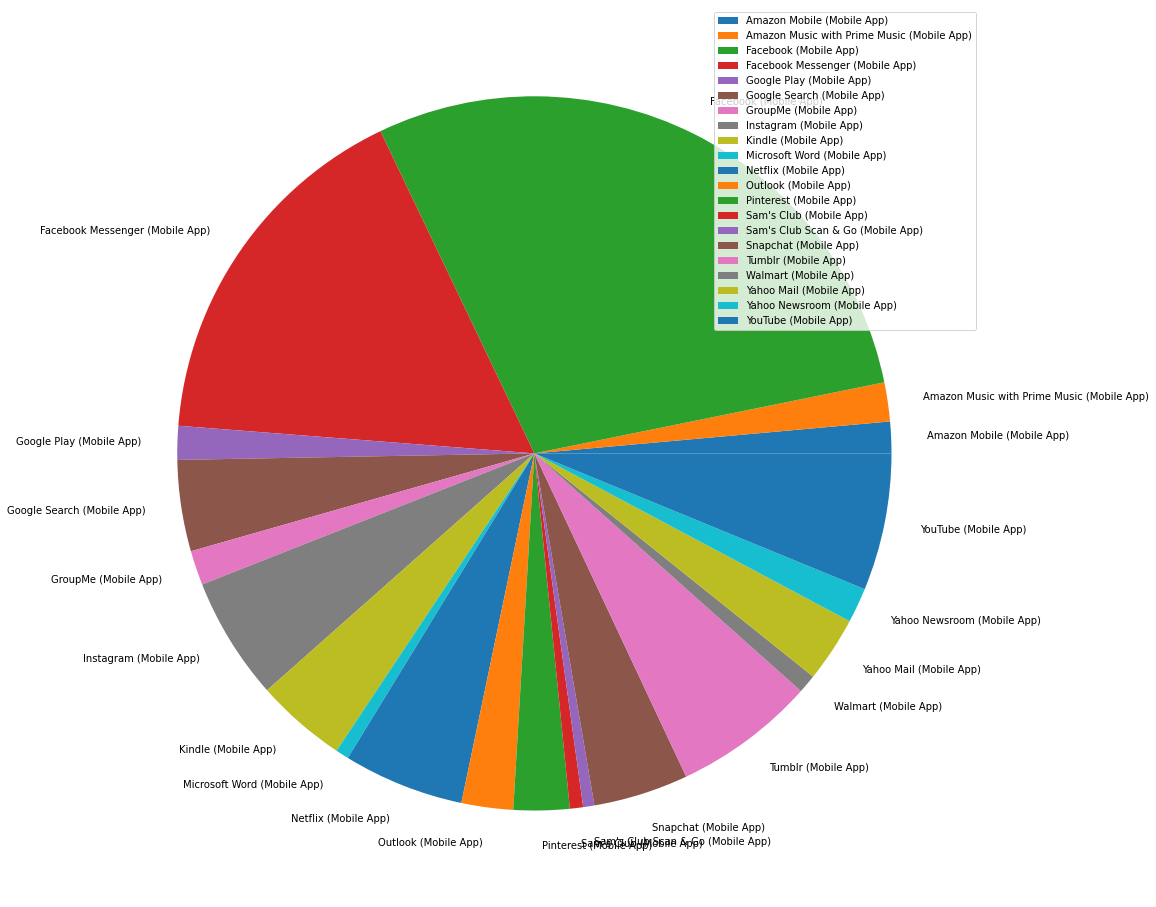

In [176]:
from matplotlib import pyplot as plt
# Creating plot
fig = plt.figure(figsize =(16, 17))
plt.pie(trans7['Avg_Time_spend_per_device'], labels = trans7['app_name'])
  
# show plot
plt.legend()
plt.show()

In [178]:
import seaborn as sns
import matplotlib.pyplot as plt

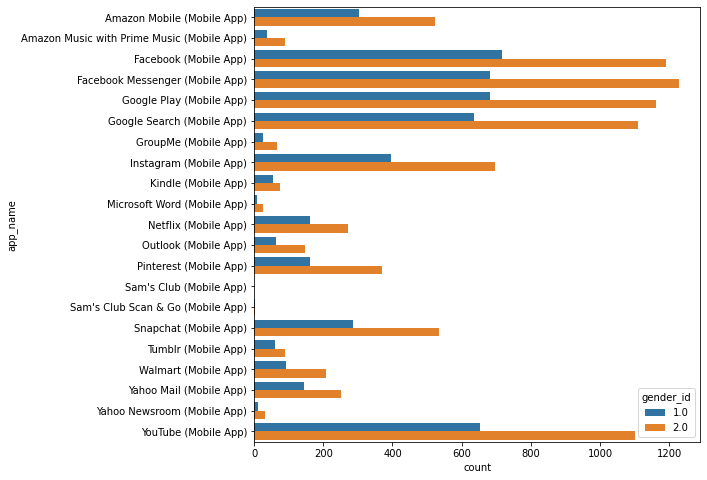

In [179]:

fig = plt.figure(figsize =(8, 8))
sns.countplot(y = 'app_name',hue = 'gender_id',data = trans4)
#plt.tight_layout()

plt.show()